# Importing the MNIST fashion data set

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Model 1: Underfit**
**Our model reaches its peak at about 77% training/validation accuracy**

## Build the model

In [80]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(3, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 105us/sample - loss: 1.2986 - acc: 0.5066 - val_loss: 0.9194 - val_acc: 0.6601
Epoch 2/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8007 - acc: 0.7037 - val_loss: 0.7681 - val_acc: 0.7084
Epoch 3/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.7201 - acc: 0.7200 - val_loss: 0.7210 - val_acc: 0.7173
Epoch 4/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6901 - acc: 0.7287 - val_loss: 0.7122 - val_acc: 0.7289
Epoch 5/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6694 - acc: 0.7456 - val_loss: 0.6820 - val_acc: 0.7508
Epoch 6/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6521 - acc: 0.7556 - val_loss: 0.6698 - val_acc: 0.7580
Epoch 7/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6404 - acc: 0.7620 - val_l

## Evaluate accuracy

In [81]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.6350 - acc: 0.7732
Test accuracy: 0.7732


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

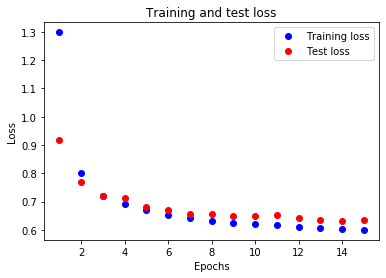

In [83]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

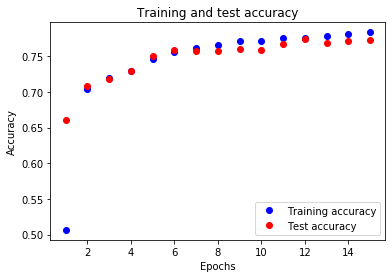

In [85]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [87]:
index = 0
predictions[index]

array([1.8240865e-09, 7.2796138e-06, 2.2182931e-11, 1.5961950e-06,
       1.2836630e-04, 4.2799149e-02, 7.7330178e-09, 3.9525756e-01,
       5.5685859e-06, 5.6180048e-01], dtype=float32)

In [88]:
np.argmax(predictions[index])

9

In [89]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

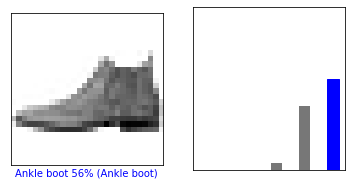

In [91]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


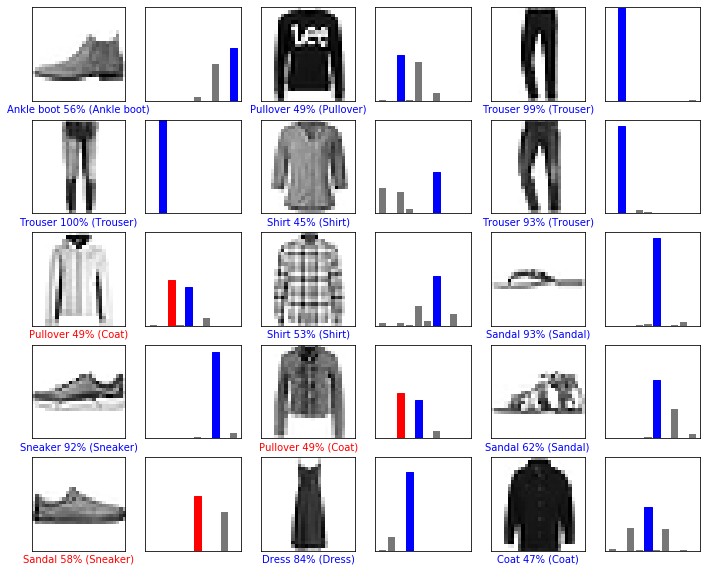

In [92]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# **Model 2: Overfit**
**Over 20 epochs, our training accuracy is around 95% while our validation accuracy stagnates at around 88%**

## Build the model

In [16]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4724 - acc: 0.8320 - val_loss: 0.4424 - val_acc: 0.8389
Epoch 2/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3586 - acc: 0.8679 - val_loss: 0.3642 - val_acc: 0.8711
Epoch 3/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3218 - acc: 0.8822 - val_loss: 0.3677 - val_acc: 0.8699
Epoch 4/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2984 - acc: 0.8890 - val_loss: 0.3376 - val_acc: 0.8809
Epoch 5/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2821 - acc: 0.8958 - val_loss: 0.3449 - val_acc: 0.8745
Epoch 6/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2671 - acc: 0.9015 - val_loss: 0.3402 - val_acc: 0.8781
Epoch 7/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2524 - acc: 0.9062 - val_l

## Evaluate accuracy

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3615 - acc: 0.8887
Test accuracy: 0.8887


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

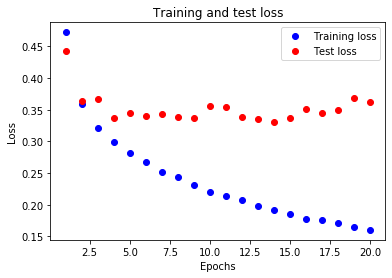

In [19]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

Model is Overfitting: The training accuracy keeps increasing at a steady rate, while the test accuracy stagnated after the first few epochs

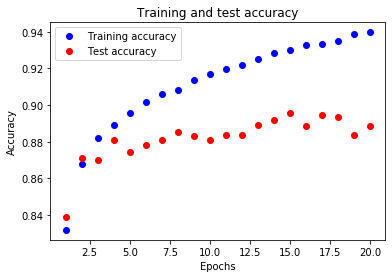

In [21]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [23]:
index = 0
predictions[index]

array([6.63085949e-12, 1.91494973e-13, 4.48701914e-14, 1.01989839e-18,
       4.50721247e-13, 1.01375036e-07, 2.40687591e-12, 5.32161794e-04,
       4.21632198e-14, 9.99467790e-01], dtype=float32)

In [24]:
np.argmax(predictions[index])

9

In [25]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

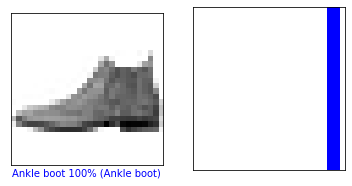

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


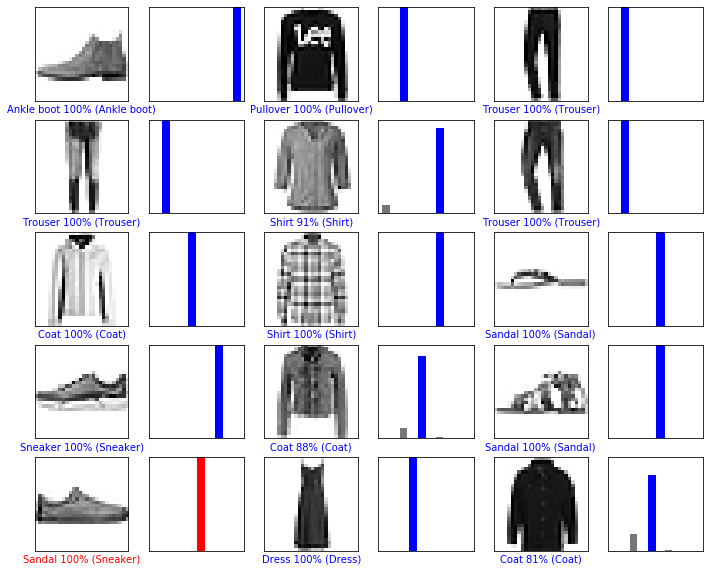

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# Model 3: **Decently Fitted**
**We achieved a similar training accuracy to the overfit Model 2 above, but maintained our training accuracy is the same range as well, over only 10 epochs**

## Build the model

In [44]:
# set up the layers
#from keras import layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu, name='Layer1'),
    keras.layers.Dense(512, activation=tf.nn.relu, name='Layer2'),
    #keras.layers.Dense(64, activation=tf.nn.relu, name='Layer3'),
    #keras.layers.Dense(512, activation=tf.nn.relu, name='Layer4'),
    keras.layers.Dense(10, activation=tf.nn.softmax, name='output')
])


# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5768 - acc: 0.7861 - val_loss: 0.4521 - val_acc: 0.8320
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4652 - acc: 0.8263 - val_loss: 0.4139 - val_acc: 0.8463
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4312 - acc: 0.8393 - val_loss: 0.4036 - val_acc: 0.8485
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4072 - acc: 0.8473 - val_loss: 0.4017 - val_acc: 0.8518
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3925 - acc: 0.8517 - val_loss: 0.3972 - val_acc: 0.8544
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3813 - acc: 0.8568 - val_loss: 0.3641 - val_acc: 0.8693
Epoch 7/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3754 - acc: 0.8574 - val_l

## Evaluate accuracy

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.3516 - acc: 0.8696
Test accuracy: 0.8696


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

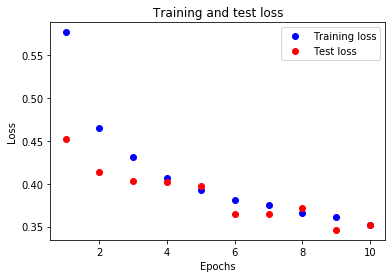

In [47]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

Model is Overfitting: The training accuracy keeps increasing at a steady rate, while the test accuracy stagnated after the first few epochs

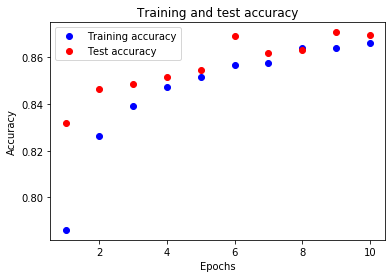

In [49]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [51]:
index = 0
predictions[index]

array([1.9830301e-08, 3.4865188e-08, 8.1215603e-09, 1.4942795e-08,
       5.2615570e-09, 2.1783339e-03, 1.3173094e-08, 8.4810309e-02,
       1.2898976e-06, 9.1301000e-01], dtype=float32)

In [52]:
np.argmax(predictions[index])

9

In [53]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

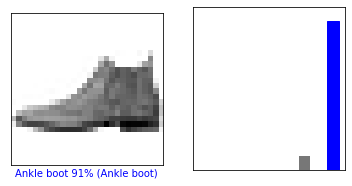

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


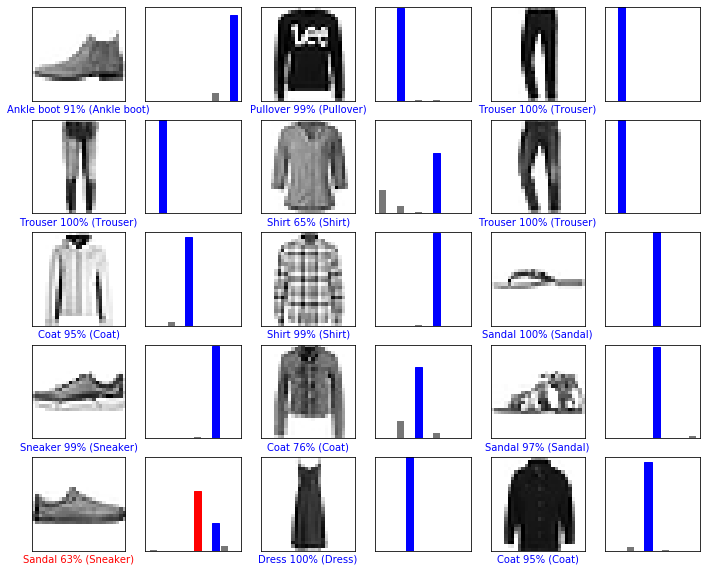

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
